![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción producción de toneladas de café diaria**

**Métodos estadísticos para analítica de datos** <br>

Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

In [2]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
url = 'https://raw.githubusercontent.com/LordOnion88/MAD/refs/heads/main/Series%20de%20Tiempo/Proyecto/base%20ajustada.csv'
data = pd.read_csv(url)

data.head()

,FECHA_CORTE,Ingresos,Deterioro
0,31/01/2016,12556235614,456212289
1,29/02/2016,11948803346,426440399
2,31/03/2016,12124055034,507291741
3,30/04/2016,12268361877,132621564
4,31/05/2016,22885166819,488187217


In [5]:
data['FECHA_CORTE'] = pd.to_datetime(data['FECHA_CORTE'])
data.set_index('FECHA_CORTE', inplace=True)

/tmp/ipykernel_208876/4171163223.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['FECHA_CORTE'] = pd.to_datetime(data['FECHA_CORTE'])


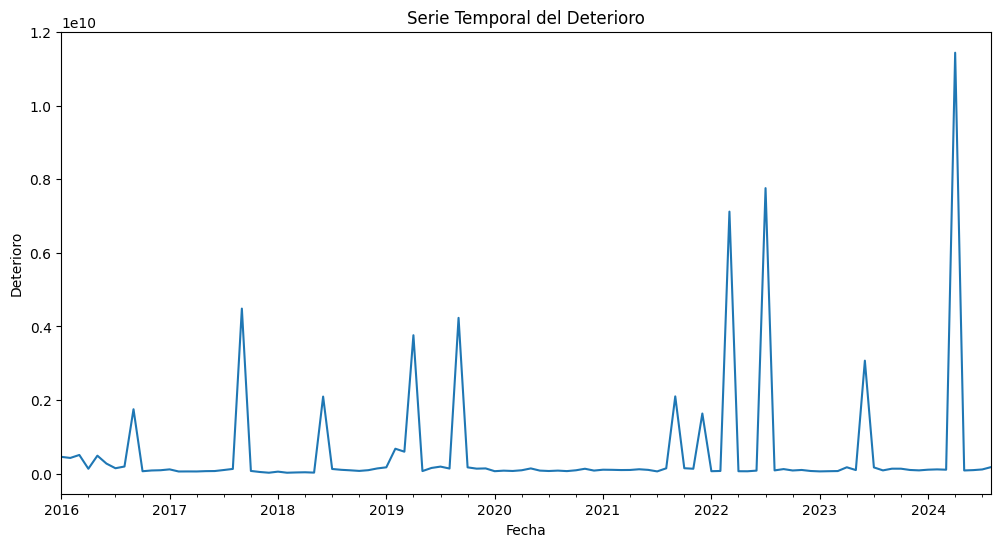

In [7]:
data['Deterioro'].plot(figsize=(12, 6))
plt.title('Serie Temporal del Deterioro')
plt.xlabel('Fecha')
plt.ylabel('Deterioro')
plt.show()

In [12]:
df_gasto = data.copy()
df_gasto = df_gasto.drop(['Ingresos'], axis = 1)
df_gasto

,Deterioro
FECHA_CORTE,
2016-01-31,456212289
2016-02-29,426440399
2016-03-31,507291741
2016-04-30,132621564
2016-05-31,488187217
...,...
2024-04-30,11441164891
2024-05-31,86331878
2024-06-30,95378649


In [13]:
adf_test = adfuller(df_gasto['Deterioro'])
print(f"Estadístico ADF: {adf_test[0]}")
print(f"P-valor: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria. Se debe realizar diferenciación.")

Estadístico ADF: -10.874711679195515
P-valor: 1.3407643854465213e-19
La serie es estacionaria.


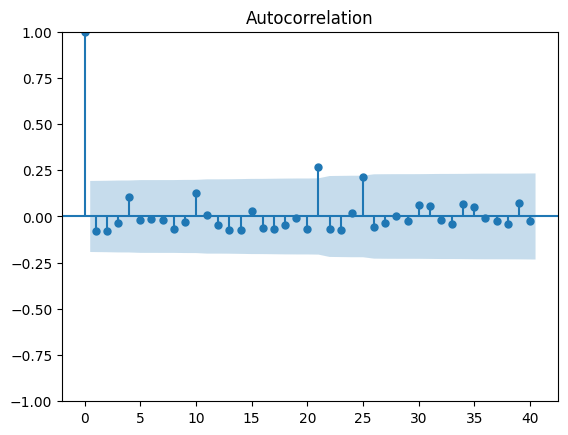

In [15]:
plot_acf(df_gasto, lags=40)
plt.show()

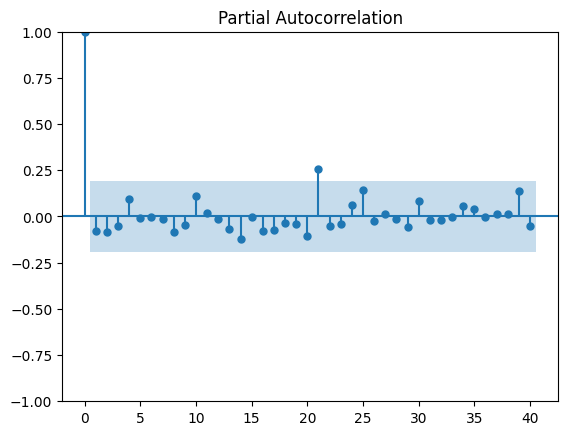

In [16]:
plot_pacf(df_gasto, lags=40)
plt.show()

In [17]:
model = ARIMA(df_gasto['Deterioro'], order=(3,1,0))
fitted_model = model.fit()

print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Deterioro   No. Observations:                  104
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -2343.398
Date:                Fri, 29 Nov 2024   AIC                           4694.796
Time:                        21:24:58   BIC                           4705.335
Sample:                    01-31-2016   HQIC                          4699.064
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8088      0.090     -8.957      0.000      -0.986      -0.632
ar.L2         -0.6013      0.088     -6.846      0.000      -0.773      -0.429
ar.L3         -0.3600      0.053     -6.812      0.0

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Predicciones del deterioro: 2024-09-30    1.118653e+08
2024-10-31    1.202514e+08
2024-11-30    1.302658e+08
2024-12-31    1.412257e+08
2025-01-31    1.233206e+08
2025-02-28    1.276067e+08
2025-03-31    1.309611e+08
2025-04-30    1.321167e+08
2025-05-31    1.276220e+08
2025-06-30    1.293548e+08
2025-07-31    1.302400e+08
2025-08-31    1.301002e+08
Freq: ME, Name: predicted_mean, dtype: float64


/tmp/ipykernel_208876/2848972778.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Predicción', color='red')


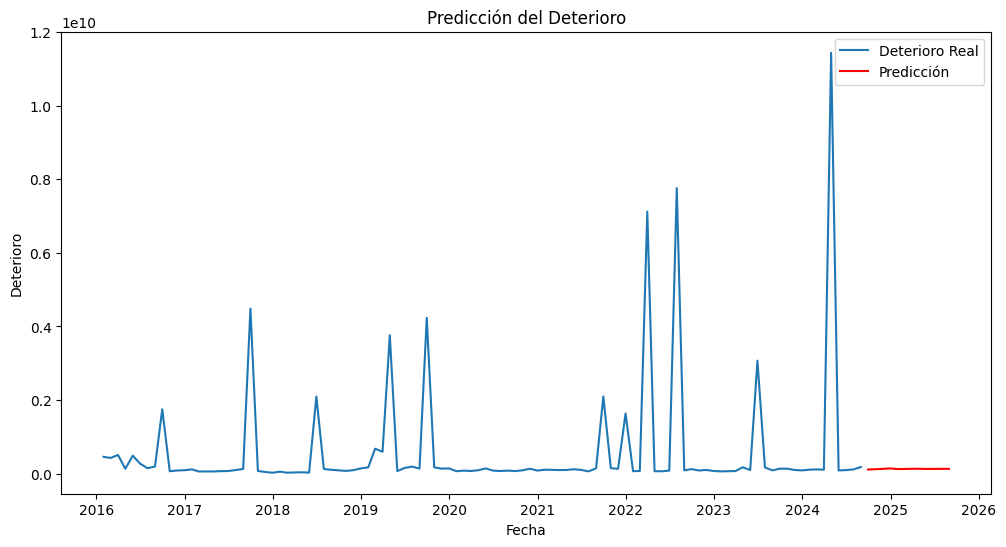

In [19]:
forecast_steps = 12  # Número de periodos a predecir, ajusta según sea necesario
forecast = fitted_model.forecast(steps=forecast_steps)
print("Predicciones del deterioro:", forecast)

# Gráfico de las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df_gasto['Deterioro'], label='Deterioro Real')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Predicción', color='red')
plt.title('Predicción del Deterioro')
plt.xlabel('Fecha')
plt.ylabel('Deterioro')
plt.legend()
plt.show()